<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/KOKONAT/library_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 7: Comparison between libraries**

### **Group name: KOKONAT**
### **Library: Pandas**
**Group members:**

| Name                                     | Matrix Number |
| :---------------------------------------- | :-------------: |
|NG SUANG JOO | A21EC0102 |
| LING WAN YIN | A21EC0047 |
| FONG KHAH KHEH | A21EC0026 |

### **1.Downloading the Dataset**

To give an overview of the chosen dataset, it is about an in-depth analysis of brewing variables, market sales patterns, and quality metrics in craft beer manufacturing (2020-2024). This extensive dataset encompasses a thorough collection of data spanning from January 2020 to January 2024, originating from a craft beer brewery. It provides a thorough insight into the brewing procedures and their impact on the market, incorporating a diverse range of brewing variables, sales data, and quality assessments. This dataset is around **2 GB** in size, and it encompasses 20 columns of attributes.


**Dataset URL:**
[Brewery Operations and Market Analysis Dataset](https://www.kaggle.com/datasets/ankurnapa/brewery-operations-and-market-analysis-dataset)


In [1]:
from google.colab import files

# Upload kaggle.json
uploaded = files.upload()

# Move Kaggle API Token to the Correct Directory
!mkdir -p /root/.kaggle
!cp kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d ankurnapa/brewery-operations-and-market-analysis-dataset
!unzip brewery-operations-and-market-analysis-dataset

Saving kaggle.json to kaggle.json
 99% 1.05G/1.06G [00:16<00:00, 124MB/s]
100% 1.06G/1.06G [00:16<00:00, 70.4MB/s]
Archive:  brewery-operations-and-market-analysis-dataset.zip
  inflating: brewery_data_complete_extended.csv  


###**2.Data Preparation and Cleaning**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import timeit

df = pd.read_csv('brewery_data_complete_extended.csv')
time_load_data = timeit.timeit(lambda:df, number=1)
print("Memory usage:", df.memory_usage().sum() / (1024 ** 2), "MB")
print("Computation Time:", time_load_data, "seconds")
print(df.head())

Memory usage: 1525.8790283203125 MB
Computation Time: 1.3050000120529148e-06 seconds
   Batch_ID            Brew_Date  Beer_Style   SKU      Location  \
0   7870796  2020-01-01 00:00:19  Wheat Beer  Kegs    Whitefield   
1   9810411  2020-01-01 00:00:31        Sour  Kegs    Whitefield   
2   2623342  2020-01-01 00:00:40  Wheat Beer  Kegs   Malleswaram   
3   8114651  2020-01-01 00:01:37         Ale  Kegs   Rajajinagar   
4   4579587  2020-01-01 00:01:43       Stout  Cans  Marathahalli   

   Fermentation_Time  Temperature  pH_Level   Gravity  Alcohol_Content  \
0                 16    24.204251  5.289845  1.039504         5.370842   
1                 13    18.086763  5.275643  1.059819         5.096053   
2                 12    15.539333  4.778016  1.037476         4.824737   
3                 17    16.418489  5.345261  1.052431         5.509243   
4                 18    19.144908  4.861854  1.054296         5.133625   

   Bitterness  Color Ingredient_Ratio  Volume_Produced   Tota

In [3]:
df.head()
head_data = timeit.timeit(lambda:df, number=1)
print("Memory usage:", df.head().memory_usage().sum() / (1024 ** 2), "MB")
print("Computation Time:", head_data, "seconds")

Memory usage: 0.000885009765625 MB
Computation Time: 2.8520000228127174e-06 seconds


###Explore the number of rows & columns, ranges of values etc.

In [4]:
import time
import psutil

start_time = time.time()
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

end_time = time.time()
exploration_time = end_time - start_time
memory = psutil.Process()
exploration_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", exploration_memory ,"MB")
print("Computation Time:", exploration_time, "seconds")

Number of rows: 10000000
Number of columns: 20
Memory usage: 2811.2109375 MB
Computation Time: 0.009906291961669922 seconds


###Handling Missing Value

In [5]:
start_time = time.time()
handling_missing_code = df.isnull().sum()
print(handling_missing_code)

end_time = time.time()
handle_missing_time = end_time - start_time
memory = psutil.Process()
handle_missing_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", handle_missing_memory ,"MB")
print("Computation Time:", handle_missing_time, "seconds")

Batch_ID                        0
Brew_Date                       0
Beer_Style                      0
SKU                             0
Location                        0
Fermentation_Time               0
Temperature                     0
pH_Level                        0
Gravity                         0
Alcohol_Content                 0
Bitterness                      0
Color                           0
Ingredient_Ratio                0
Volume_Produced                 0
Total_Sales                     0
Quality_Score                   0
Brewhouse_Efficiency            0
Loss_During_Brewing             0
Loss_During_Fermentation        0
Loss_During_Bottling_Kegging    0
dtype: int64
Memory usage: 2811.2109375 MB
Computation Time: 9.36748719215393 seconds


#### Column type

In [6]:
start_time = time.time()
column_types = df.dtypes
print("\nData types of each column:\n")
for column, column_type in column_types.items():
    print(f"{column}: {column_type}")

end_time = time.time()
column_time = end_time - start_time
memory = psutil.Process()
column_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", column_memory ,"MB")
print("Computation Time:", column_time, "seconds")


Data types of each column:

Batch_ID: int64
Brew_Date: object
Beer_Style: object
SKU: object
Location: object
Fermentation_Time: int64
Temperature: float64
pH_Level: float64
Gravity: float64
Alcohol_Content: float64
Bitterness: int64
Color: int64
Ingredient_Ratio: object
Volume_Produced: int64
Total_Sales: float64
Quality_Score: float64
Brewhouse_Efficiency: float64
Loss_During_Brewing: float64
Loss_During_Fermentation: float64
Loss_During_Bottling_Kegging: float64
Memory usage: 2811.2109375 MB
Computation Time: 0.009453058242797852 seconds


#### Number of unique values per columns

In [7]:
start_time = time.time()
df.nunique()

end_time = time.time()
nunique_time = end_time - start_time
memory = psutil.Process()
nunique_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", nunique_memory ,"MB")
print("Computation Time:", nunique_time, "seconds")

Memory usage: 2812.5 MB
Computation Time: 50.357383012771606 seconds


###Parsing 'Brew_Date'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 20 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Batch_ID                      int64  
 1   Brew_Date                     object 
 2   Beer_Style                    object 
 3   SKU                           object 
 4   Location                      object 
 5   Fermentation_Time             int64  
 6   Temperature                   float64
 7   pH_Level                      float64
 8   Gravity                       float64
 9   Alcohol_Content               float64
 10  Bitterness                    int64  
 11  Color                         int64  
 12  Ingredient_Ratio              object 
 13  Volume_Produced               int64  
 14  Total_Sales                   float64
 15  Quality_Score                 float64
 16  Brewhouse_Efficiency          float64
 17  Loss_During_Brewing           float64
 18  Loss_During_Fermentat

From the info we can see that the 'Brew_Date' is object type, to parse it, we need to change it to datetime type.

In [5]:
df['Brew_Date'] = pd.to_datetime(df['Brew_Date'])

In [6]:
start_time = time.time()
df['date'] = df['Brew_Date'].dt.date
df['time'] = df['Brew_Date'].dt.time
print(df.head())

end_time = time.time()
parsing_time = end_time - start_time
memory = psutil.Process()
parsing_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", parsing_memory ,"MB")
print("Computation Time:", parsing_time, "seconds")

   Batch_ID           Brew_Date  Beer_Style   SKU      Location  \
0   7870796 2020-01-01 00:00:19  Wheat Beer  Kegs    Whitefield   
1   9810411 2020-01-01 00:00:31        Sour  Kegs    Whitefield   
2   2623342 2020-01-01 00:00:40  Wheat Beer  Kegs   Malleswaram   
3   8114651 2020-01-01 00:01:37         Ale  Kegs   Rajajinagar   
4   4579587 2020-01-01 00:01:43       Stout  Cans  Marathahalli   

   Fermentation_Time  Temperature  pH_Level   Gravity  Alcohol_Content  ...  \
0                 16    24.204251  5.289845  1.039504         5.370842  ...   
1                 13    18.086763  5.275643  1.059819         5.096053  ...   
2                 12    15.539333  4.778016  1.037476         4.824737  ...   
3                 17    16.418489  5.345261  1.052431         5.509243  ...   
4                 18    19.144908  4.861854  1.054296         5.133625  ...   

   Ingredient_Ratio  Volume_Produced   Total_Sales  Quality_Score  \
0       1:0.32:0.16             4666   2664.759345   

###**3. Exploratory Analysis and Visualization**

Overview

In [8]:
import seaborn as sns
start_time = time.time()
df.describe()

end_time = time.time()
overview_time = end_time - start_time
memory = psutil.Process()
overview_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", overview_memory ,"MB")
print("Computation Time:", overview_time, "seconds")

Memory usage: 2844.78125 MB
Computation Time: 8.186732530593872 seconds


**Total Volume Produced by Beer Style**

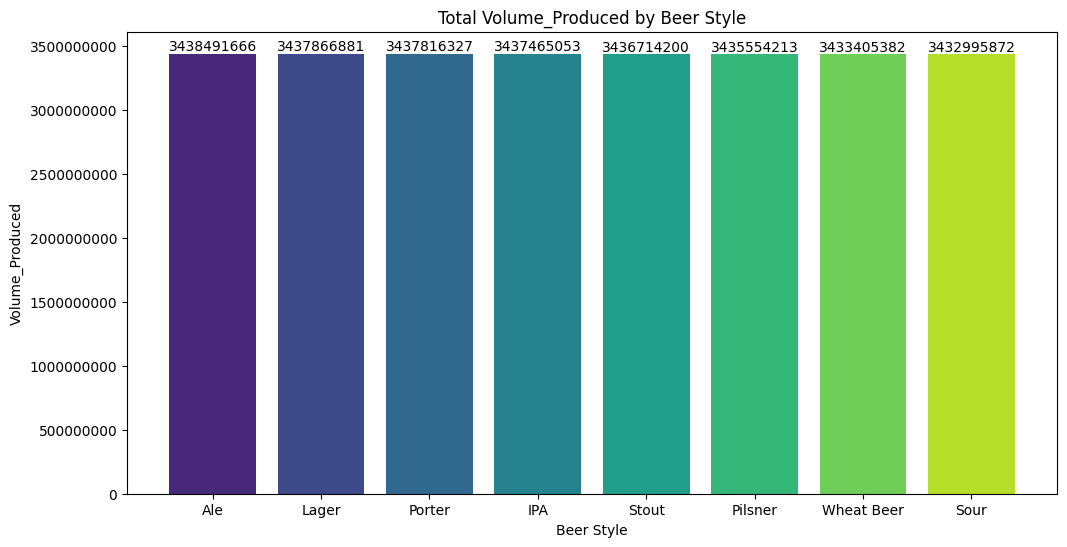

Memory usage: 3986.7890625 MB
Computation Time: 1.1808910369873047 seconds


In [9]:
start_time = time.time()
sales_by_style = df.groupby('Beer_Style')['Volume_Produced'].sum().reset_index()
sales_by_style = sales_by_style.sort_values(by='Volume_Produced', ascending=False)

colors = sns.color_palette('viridis', len(sales_by_style))

plt.figure(figsize=(12, 6))
bars = plt.bar(sales_by_style['Beer_Style'], sales_by_style['Volume_Produced'], color=colors)
plt.xlabel('Beer Style')
plt.ylabel('Volume_Produced')
plt.title('Total Volume_Produced by Beer Style')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, round(yval, 2), ha='center', va='bottom')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

end_time = time.time()
bar_time = end_time - start_time
memory = psutil.Process()
bar_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", bar_memory ,"MB")
print("Computation Time:", bar_time, "seconds")

Insights:

The Total Volume Produced by Beer Style reveals that among various beer styles, Ale stands out as the category with the highest total volume of beer produced.

**Average Fermentation Time by Beer Style**

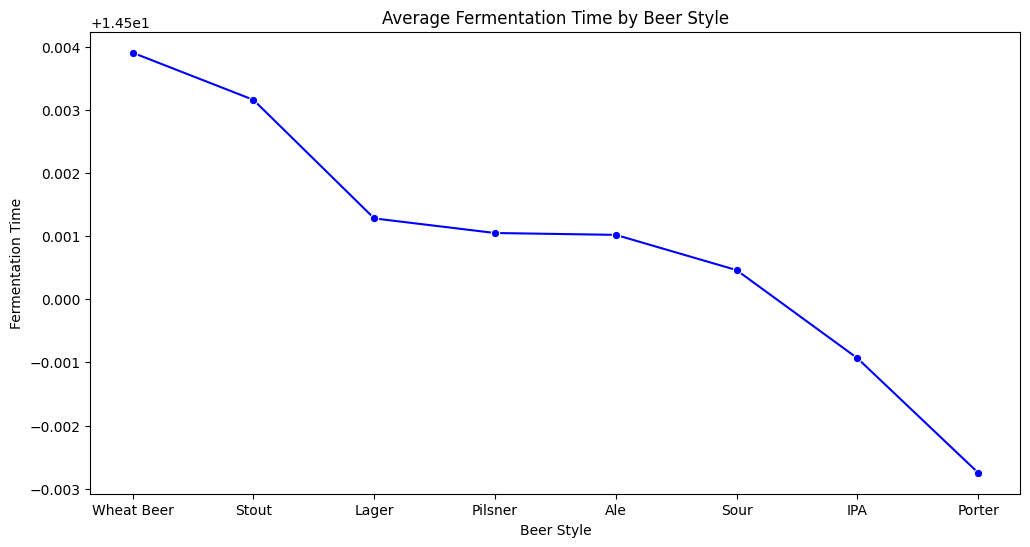

Memory usage: 3987.87109375 MB
Computation Time: 1.2894868850708008 seconds


In [10]:
start_time = time.time()
fermentation_by_style = df.groupby('Beer_Style')['Fermentation_Time'].mean().reset_index()
fermentation_by_style = fermentation_by_style.sort_values(by='Fermentation_Time', ascending=False)

plt.figure(figsize=(12, 6))
line = sns.lineplot(x='Beer_Style', y='Fermentation_Time', data=fermentation_by_style, marker='o', color='blue')
plt.xlabel('Beer Style')
plt.ylabel('Fermentation Time')
plt.title('Average Fermentation Time by Beer Style')
plt.xticks(rotation=0)

plt.show()

end_time = time.time()
line_time = end_time - start_time
memory = psutil.Process()
line_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", line_memory ,"MB")
print("Computation Time:", line_time, "seconds")

**Insights:**

 Wheat Beer exhibits the longest average fermentation time when compared to other beer styles.

### **Fermentation Time by Beer Style**

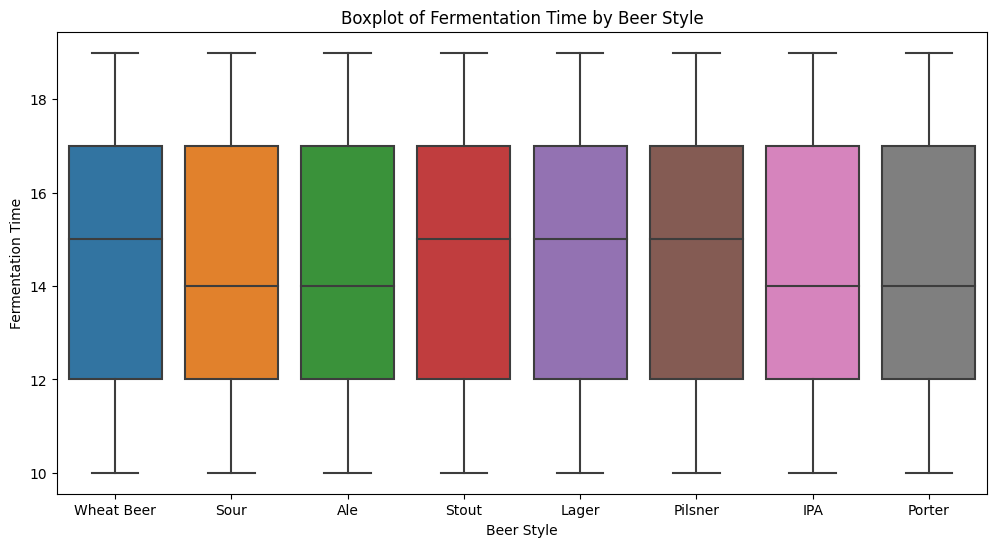

Memory usage: 3988.90234375 MB
Computation Time: 7.583525896072388 seconds


In [11]:
start_time = time.time()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Beer_Style', y='Fermentation_Time', data=df)
plt.title('Boxplot of Fermentation Time by Beer Style')
plt.xlabel('Beer Style')
plt.ylabel('Fermentation Time')
plt.show()

end_time = time.time()
box_time = end_time - start_time
memory = psutil.Process()
box_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", box_memory, "MB")
print("Computation Time:", box_time, "seconds")

**Insights:**

There are no outliers present in the fermentation time data for any beer style, indicating a relatively consistent and uniform distribution within each category.

**Correlation between the fermentation time, temperature, pH level, gravity, and quality score.**

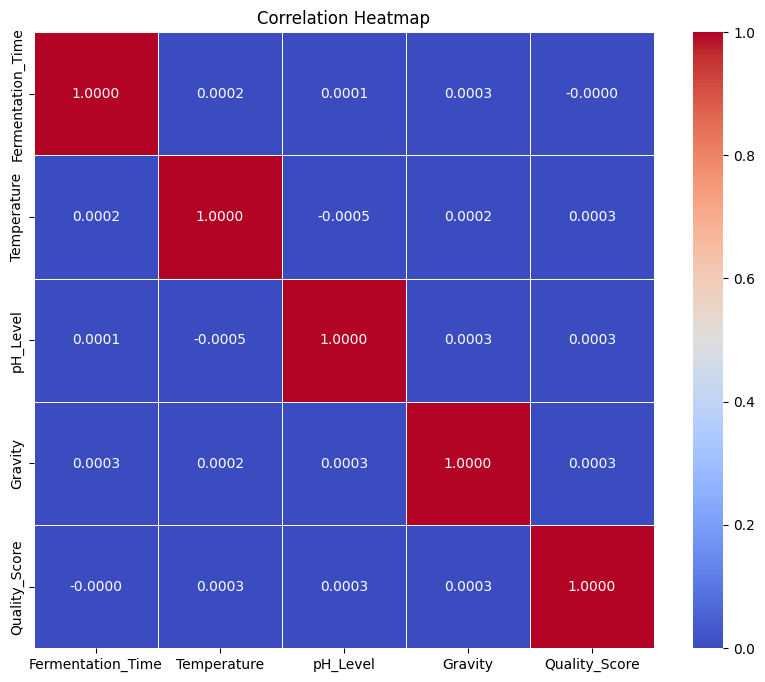

Memory usage: 3990.30859375 MB
Computation Time: 4.137321949005127 seconds


In [12]:
start_time = time.time()
cor = ['Fermentation_Time', 'Temperature', 'pH_Level', 'Gravity', 'Quality_Score']
df_cor = df[cor]

correlation = df_cor.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".4f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

end_time = time.time()
corr_time = end_time - start_time
memory = psutil.Process()
corr_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", corr_memory ,"MB")
print("Computation Time:", corr_time, "seconds")

**Insights:**

The correlation coefficients between 2 variables close to zero suggest that there is almost no linear association between them.

**Total Sales by Beer Style**

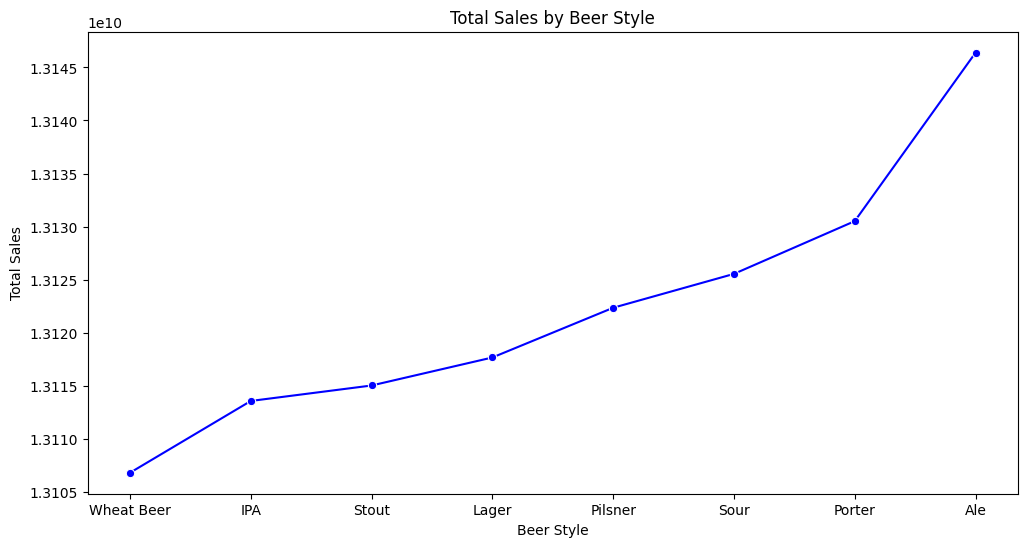

Memory usage: 3991.08203125 MB
Computation Time: 1.4941904544830322 seconds


In [13]:
start_time = time.time()
sales_by_style = df.groupby('Beer_Style')['Total_Sales'].sum().reset_index()
sales_by_style = sales_by_style.sort_values(by='Total_Sales', ascending=True)

plt.figure(figsize=(12, 6))
line2 = sns.lineplot(x='Beer_Style', y='Total_Sales', data=sales_by_style, marker='o', color='blue')
plt.xlabel('Beer Style')
plt.ylabel('Total Sales')
plt.title('Total Sales by Beer Style')
plt.xticks(rotation=0)

plt.show()

end_time = time.time()
line2_time = end_time - start_time
memory = psutil.Process()
line2_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", line2_memory ,"MB")
print("Computation Time:", line2_time, "seconds")

**Insights:**

Wheat Beer stands out with the highest average fermentation time compared to other styles. This longer fermentation period may contribute unique flavors and characteristics to Wheat Beer, catering to a specific consumer preference. However, despite the longer fermentation time, Wheat Beer records the lowest total sales among the styles.

**Total Loss by Beer Style**

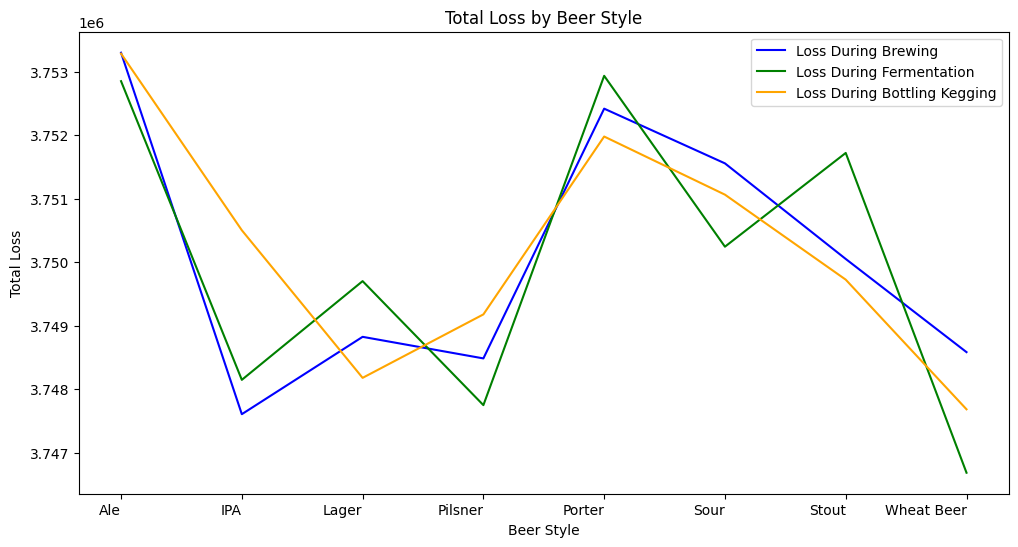

Memory usage: 3991.85546875 MB
Computation Time: 1.1857013702392578 seconds


In [14]:
start_time = time.time()
result = df.groupby('Beer_Style').agg({
    'Loss_During_Brewing': 'sum',
    'Loss_During_Fermentation': 'sum',
    'Loss_During_Bottling_Kegging': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Beer_Style', y='Loss_During_Brewing', data=result, label='Loss During Brewing', color='blue')
sns.lineplot(x='Beer_Style', y='Loss_During_Fermentation', data=result, label='Loss During Fermentation', color='green')
sns.lineplot(x='Beer_Style', y='Loss_During_Bottling_Kegging', data=result, label='Loss During Bottling Kegging', color='orange')

plt.xlabel('Beer Style')
plt.ylabel('Total Loss')
plt.title('Total Loss by Beer Style')
plt.xticks(rotation=0, ha='right')
plt.legend()

plt.show()

end_time = time.time()
loss_time = end_time - start_time
memory = psutil.Process()
loss_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", loss_memory ,"MB")
print("Computation Time:", loss_time, "seconds")

**Insights:**

The analysis indicates that Ale beer experiences the highest total losses during the brewing, fermentation, and bottling/kegging stages.

###**4. Asking and Answering Questions**

**1. Which beer style has the highest average quality score?**

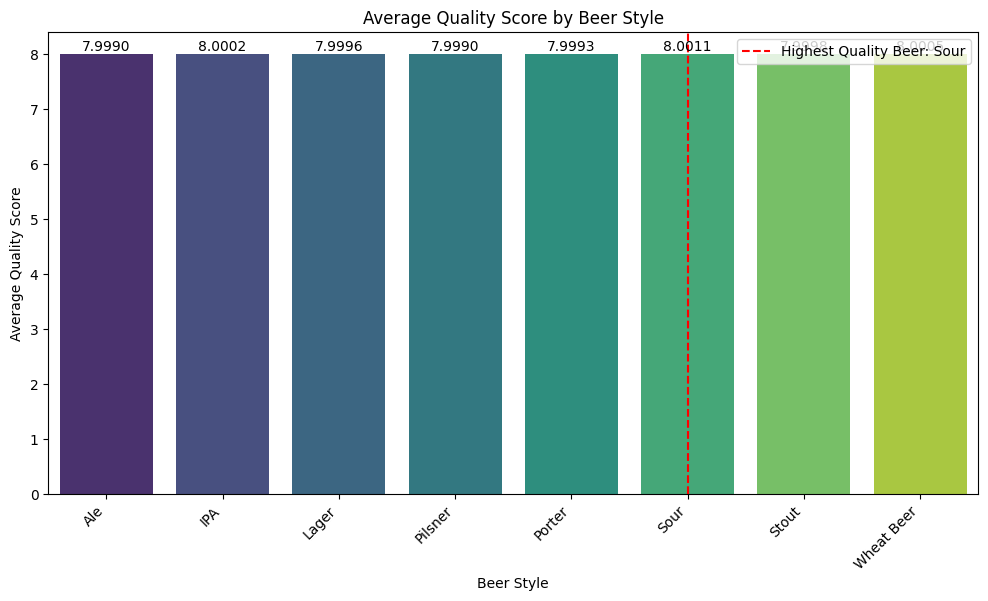

Memory usage: 3994.765625 MB
Computation Time: 1.6493182182312012 seconds


In [17]:
start_time = time.time()
average_quality_by_style = df.groupby('Beer_Style')['Quality_Score'].mean().reset_index()

# Find the beer style with the highest average quality score
highest_quality_beer = average_quality_by_style.loc[average_quality_by_style['Quality_Score'].idxmax(), 'Beer_Style']

# Plot a bar graph
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='Beer_Style', y='Quality_Score', data=average_quality_by_style, palette='viridis')
plt.title('Average Quality Score by Beer Style')
plt.xlabel('Beer Style')
plt.ylabel('Average Quality Score')
plt.xticks(rotation=45, ha='right')

# Highlight the beer style with the highest average quality score
plt.axvline(x=average_quality_by_style[average_quality_by_style['Beer_Style'] == highest_quality_beer].index[0],
            color='red', linestyle='--', label=f'Highest Quality Beer: {highest_quality_beer}')
plt.legend()

# Add labels for every bar
for index, value in enumerate(average_quality_by_style['Quality_Score']):
    plt.text(index, value, f'{value:.4f}', ha='center', va='bottom')

plt.show()

end_time = time.time()
quality_score_time = end_time - start_time
memory = psutil.Process()
quality_score_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", quality_score_memory ,"MB")
print("Computation Time:", quality_score_time, "seconds")

**Insights:**

The highest quality beer is Sour with an average quality score of 8.0011.

**2. What is the total volume produced for each location?**

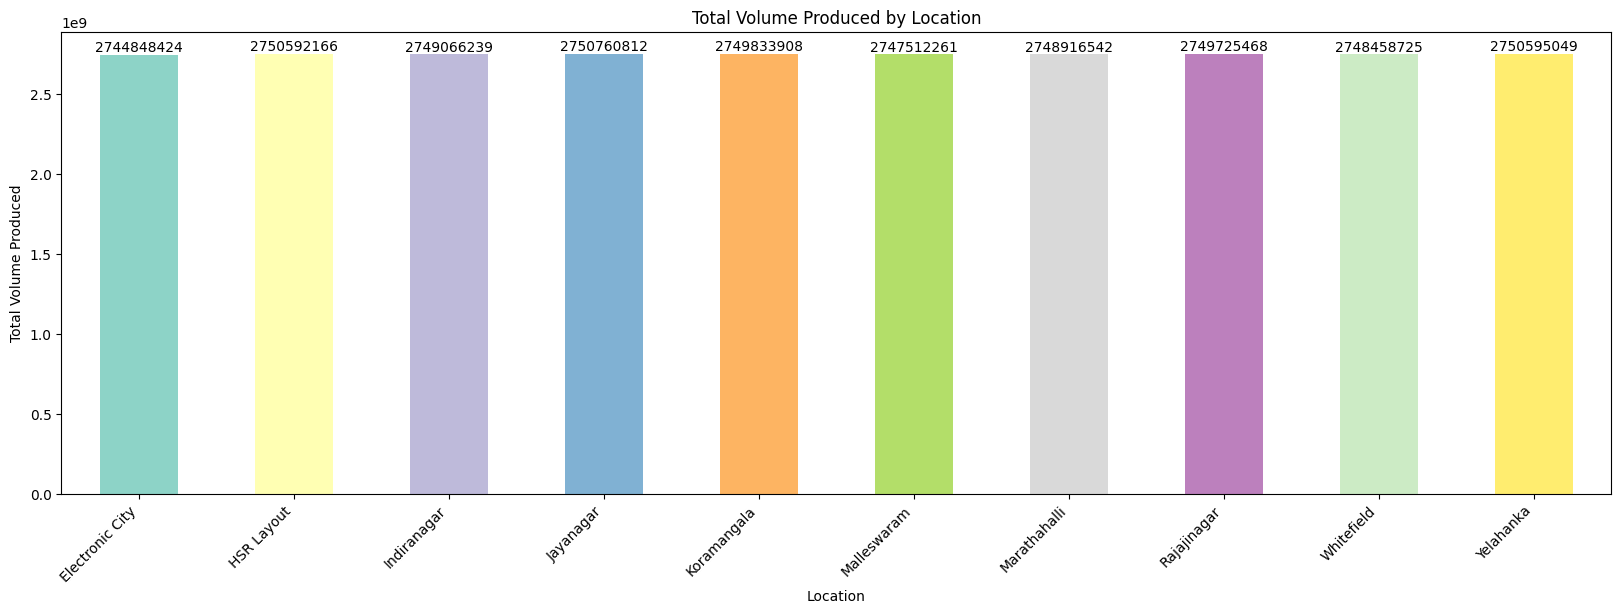

Memory usage: 3995.53515625 MB
Computation Time: 1.0970861911773682 seconds


In [18]:
import numpy as np
start_time = time.time()

total_volume_by_location = df.groupby('Location')['Volume_Produced'].sum()
colors = plt.cm.Set3(np.linspace(0, 1, len(total_volume_by_location)))
plt.figure(figsize=(20, 6))
bars = total_volume_by_location.plot(kind='bar', color=colors)
plt.title('Total Volume Produced by Location')
plt.xlabel('Location')
plt.ylabel('Total Volume Produced')
plt.xticks(rotation=45, ha='right')

# Add labels for each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50, round(yval, 2), ha='center', va='bottom')

plt.show()

end_time = time.time()
total_volume_location_time = end_time - start_time
memory = psutil.Process()
total_volume_location_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", total_volume_location_memory, "MB")
print("Computation Time:", total_volume_location_time, "seconds")

**Insights:**

The analysis indicates that the city of Jayanagar has the highest total volume of beer production.

**3. What is the relation between fermentation time and alcohol content?**

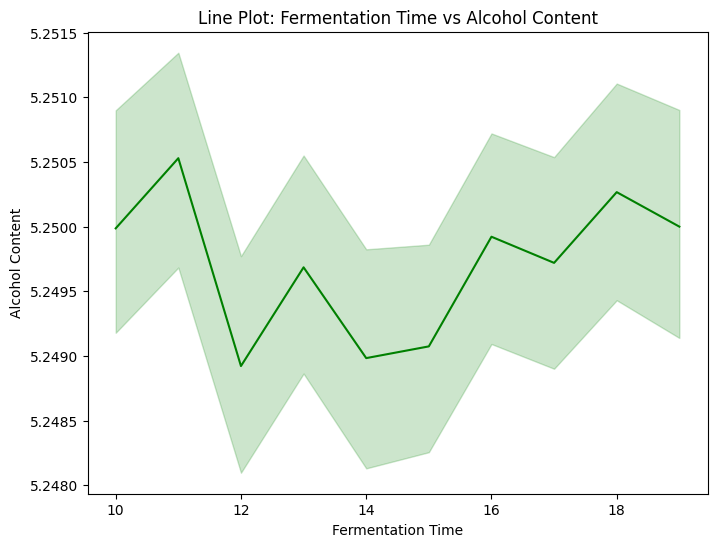

Memory usage: 3996.8046875 MB
Computation Time: 501.99929666519165 seconds


In [19]:
start_time = time.time()
plt.figure(figsize=(8, 6))
sns.lineplot(x='Fermentation_Time', y='Alcohol_Content', data=df, color='green')
plt.title('Line Plot: Fermentation Time vs Alcohol Content')
plt.xlabel('Fermentation Time')
plt.ylabel('Alcohol Content')
plt.show()

end_time = time.time()
ferm_alcohol_time = end_time - start_time
memory = psutil.Process()
ferm_alcohol_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", ferm_alcohol_memory ,"MB")
print("Computation Time:", ferm_alcohol_time, "seconds")

**Insights:**

The duration of fermentation does not have a strong impact on the alcohol content of the beer.

**4. Which ingredient ratio is associated with the highest total sales?**

In [20]:
start_time = time.time()
highest_sales_ratio = df.groupby('Ingredient_Ratio')['Total_Sales'].sum().idxmax()
print(f"The ingredient ratio associated with the highest total sales is: {highest_sales_ratio}")

end_time = time.time()
ingre_ratio_time = end_time - start_time
memory = psutil.Process()
ingre_ratio_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", ingre_ratio_memory ,"MB")
print("Computation Time:", ingre_ratio_time, "seconds")

The ingredient ratio associated with the highest total sales is: 1:0.41:0.20
Memory usage: 3996.8046875 MB
Computation Time: 0.7371337413787842 seconds


**Insights:**

The composition of ingredients ratio 1:0.41:0.20 resonates well with consumer preferences, leading to increased sales.

**5. What is the average loss during brewing, fermentation, and bottling/kegging for each beer style?**

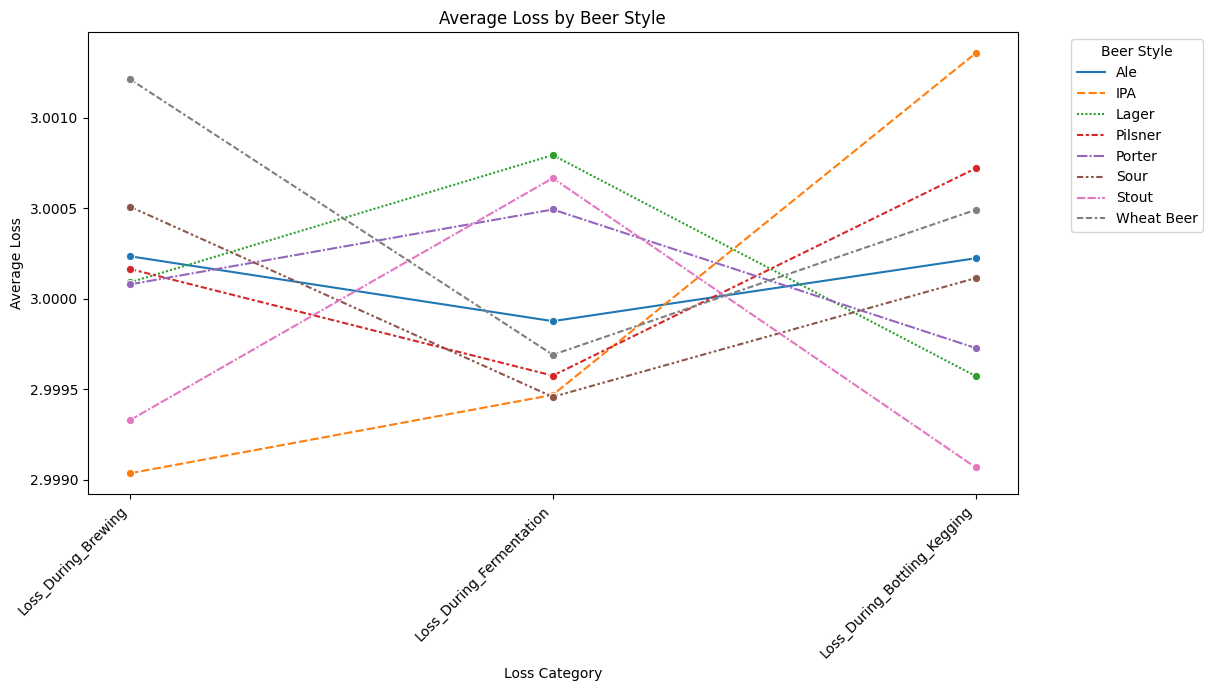

Memory usage: 3997.57421875 MB
Computation Time: 1.7633934020996094 seconds


In [21]:
start_time = time.time()
average_loss_by_style = df.groupby('Beer_Style').agg({
    'Loss_During_Brewing': 'mean',
    'Loss_During_Fermentation': 'mean',
    'Loss_During_Bottling_Kegging': 'mean'
})

plt.figure(figsize=(12, 6))
sns.lineplot(data=average_loss_by_style.T, marker='o')
plt.title('Average Loss by Beer Style')
plt.xlabel('Loss Category')
plt.ylabel('Average Loss')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Beer Style', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

end_time = time.time()
avg_loss_time = end_time - start_time
memory = psutil.Process()
avg_loss_memory = memory.memory_info().rss / (1024 ** 2)
print("Memory usage:", avg_loss_memory ,"MB")
print("Computation Time:", avg_loss_time, "seconds")

**Insights:**

Wheat Beer stands out as the beer style with the highest losses during brewing, indicating potential challenges or inefficiencies in the brewing process for this particular style. On the other hand, Lager records the highest percentage of volume loss during fermentation, suggesting that this style may require additional attention or optimization in the fermentation phase. Lastly, IPA shows the highest percentage of volume loss during the bottling or kegging process, emphasizing the need for careful handling and processing at this stage for this specific beer style.

###**Inference and Conclusion**

1. **Total Volume Produced by Beer Style:** Ale emerges as the beer style with the highest total volume, indicating its popularity and significant contribution to overall beer production.

2. **Average Fermentation Time by Beer Style:** Wheat Beer exhibits the longest average fermentation time, suggesting a distinctive and potentially time-intensive brewing process for this style.

3. **Outliers and Uniformity in Fermentation Time:** The absence of outliers in fermentation time across beer styles suggests a relatively consistent distribution, providing brewers with insights into typical fermentation durations.

4. **Correlation Coefficients:** The correlation coefficients close to zero imply a lack of a strong linear association between variables, emphasizing the need for further investigation into any observed patterns.

5. **Production Volume, Sales, and Fermentation Time by Beer Style:** Ale, leading in total production and sales, showcases the alignment between popularity and market demand. Wheat Beer, with a longer fermentation time, caters to a niche market, while facing lower total sales.

6. **Losses During Brewing, Fermentation, and Bottling/Kegging by Beer Style:** Ale experiences the highest losses during various production stages, indicating potential inefficiencies that should be addressed for optimization.

7. **Quality Scores by Beer Style:** Sour beer attains the highest average quality score, showcasing its positive reception among consumers.

8. **City-wise Total Volume of Beer Production:** Jayanagar emerges as the city with the highest total volume of beer production, offering insights for local breweries and businesses.

9. **Impact of Fermentation Duration on Alcohol Content:** The analysis suggests that the duration of fermentation does not strongly influence the alcohol content of the beer.

10. **Ingredient Ratio and Total Sales:** The ingredient ratio 1:0.41:0.20 is associated with the highest total sales, providing guidance for brewers on ingredient composition to enhance market performance.

11. **Losses and Efficiency by Beer Style:** Wheat Beer, Lager, and IPA exhibit distinct patterns of losses during brewing, fermentation, and bottling/kegging, offering insights for brewers to optimize production efficiency.